phase -1 import data and define

In [2]:
import pandas as pd
import numpy as np

dataset_path = "vmCloud_data.csv"
Cloud_data = pd.read_csv(dataset_path)

In [3]:
print(Cloud_data.head())

                                  vm_id            timestamp  cpu_usage  \
0  c5215826-6237-4a33-9312-72c1df909881  2023-01-25 09:10:54  54.881350   
1  29690bc6-1f34-403b-b509-a1ecb1834fb8  2023-01-26 04:46:34  71.518937   
2  2e55abc3-5bad-46cb-b445-a577f5e9bf2a  2023-01-13 23:39:47        NaN   
3  e672e32f-c134-4fbc-992b-34eb63bef6bf  2023-02-09 11:45:49  54.488318   
4  f38b8b50-6926-4533-be4f-89ad11624071  2023-06-14 08:27:26  42.365480   

   memory_usage  network_traffic  power_consumption  \
0     78.950861       164.775973         287.808986   
1     29.901883              NaN         362.273569   
2     92.709195       203.674847         231.467903   
3     88.100960              NaN         195.639954   
4           NaN              NaN         359.451537   

   num_executed_instructions  execution_time  energy_efficiency task_type  \
0                     7527.0       69.345575           0.553589   network   
1                     5348.0       41.396040           0.349856 

In [4]:
# Display the columns in the dataset
print(Cloud_data.columns)

Index(['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic',
       'power_consumption', 'num_executed_instructions', 'execution_time',
       'energy_efficiency', 'task_type', 'task_priority', 'task_status'],
      dtype='object')


phase - 2 * preprocessing the data and normalizing the values and cleaning the data


In [5]:
from sklearn.preprocessing import MinMaxScaler

Cloud_data.fillna(Cloud_data.mean(numeric_only=True), inplace=True)

# missing values and stuff
for column in ['task_type', 'task_priority', 'task_status']:
    Cloud_data[column] = Cloud_data[column].fillna(Cloud_data[column].mode()[0])
    
columns_to_normalize = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency']

#using the min max scaler
scaler = MinMaxScaler()

Cloud_data[columns_to_normalize] = scaler.fit_transform(Cloud_data[columns_to_normalize])

#check 
print(Cloud_data.head())

                                  vm_id            timestamp  cpu_usage  \
0  c5215826-6237-4a33-9312-72c1df909881  2023-01-25 09:10:54   0.548813   
1  29690bc6-1f34-403b-b509-a1ecb1834fb8  2023-01-26 04:46:34   0.715189   
2  2e55abc3-5bad-46cb-b445-a577f5e9bf2a  2023-01-13 23:39:47   0.500122   
3  e672e32f-c134-4fbc-992b-34eb63bef6bf  2023-02-09 11:45:49   0.544883   
4  f38b8b50-6926-4533-be4f-89ad11624071  2023-06-14 08:27:26   0.423655   

   memory_usage  network_traffic  power_consumption  \
0      0.789509         0.164776           0.575619   
1      0.299019         0.500008           0.724548   
2      0.927093         0.203675           0.462936   
3      0.881010         0.500008           0.391280   
4      0.499819         0.500008           0.718904   

   num_executed_instructions  execution_time  energy_efficiency task_type  \
0                   0.752775        0.693456           0.553589   network   
1                   0.534853        0.413960           0.349856 

In [6]:
#check
# Check for Missing Values
print("Missing values per column:")
print(Cloud_data.isnull().sum())

# Check Data Types
print("\nData types of each column:")
print(Cloud_data.dtypes)

#Check Normalization
print("\nMin and Max values for normalized columns:")
for column in ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency']:
    print(f"{column}: Min = {Cloud_data[column].min()}, Max = {Cloud_data[column].max()}")

#Inspection
# Display the first few rows of the DataFrame
print("\nFirst few rows for visual inspection:")
print(Cloud_data.head())

Missing values per column:
vm_id                        200638
timestamp                    200666
cpu_usage                         0
memory_usage                      0
network_traffic                   0
power_consumption                 0
num_executed_instructions         0
execution_time                    0
energy_efficiency                 0
task_type                         0
task_priority                     0
task_status                       0
dtype: int64

Data types of each column:
vm_id                         object
timestamp                     object
cpu_usage                    float64
memory_usage                 float64
network_traffic              float64
power_consumption            float64
num_executed_instructions    float64
execution_time               float64
energy_efficiency            float64
task_type                     object
task_priority                 object
task_status                   object
dtype: object

Min and Max values for normalized columns

Phase - 3 feature engineering - ectracing relevent features from the data

In [7]:
#coveting col to datetime
Cloud_data['timestamp'] = pd.to_datetime(Cloud_data['timestamp'])

Cloud_data['hour_of_day'] = Cloud_data['timestamp'].dt.hour
Cloud_data['day_of_week'] = Cloud_data['timestamp'].dt.dayofweek  # Monday=0, Sunday=6


In [8]:
#historical ussage patterns
Cloud_data['cpu_usage_7d_avg'] = Cloud_data['cpu_usage'].rolling(window=7, min_periods=1).mean()

Cloud_data['memory_usage_7d_avg'] = Cloud_data['memory_usage'].rolling(window=7, min_periods=1).mean()

Cloud_data.sort_values('timestamp', inplace=True)

#check
print(Cloud_data.head())

                                        vm_id           timestamp  cpu_usage  \
454771   a5ee77f0-5a60-474d-8a66-11bf38337326 2023-01-01 00:00:09   0.632821   
969844                                    NaN 2023-01-01 00:00:15   0.307198   
898414   fe5e04e3-4ea4-48cf-a193-3f58abd147ed 2023-01-01 00:00:31   0.140195   
197262   caf092f0-55c3-4486-a295-f04a9a2c6406 2023-01-01 00:00:36   0.931486   
1505883  ca081259-cb36-4c07-a7db-5af5f8676930 2023-01-01 00:00:40   0.990775   

         memory_usage  network_traffic  power_consumption  \
454771       0.499819         0.212708           0.716255   
969844       0.891993         0.604264           0.651642   
898414       0.743673         0.600521           0.737472   
197262       0.689791         0.621710           0.316036   
1505883      0.714444         0.760885           0.392749   

         num_executed_instructions  execution_time  energy_efficiency  \
454771                    0.398340        0.453030           0.681050   
969844

In [9]:
#checking whether historical ussage patterns are calculated or not
#Check for NaN Values
print("NaN values in 'cpu_usage_7d_avg':", Cloud_data['cpu_usage_7d_avg'].isnull().sum())
print("NaN values in 'memory_usage_7d_avg':", Cloud_data['memory_usage_7d_avg'].isnull().sum())

# Visual Inspection
print("\nFirst few rows for visual inspection:")
print(Cloud_data.head())
print("\nLast few rows for visual inspection:")
print(Cloud_data.tail())


NaN values in 'cpu_usage_7d_avg': 0
NaN values in 'memory_usage_7d_avg': 0

First few rows for visual inspection:
                                        vm_id           timestamp  cpu_usage  \
454771   a5ee77f0-5a60-474d-8a66-11bf38337326 2023-01-01 00:00:09   0.632821   
969844                                    NaN 2023-01-01 00:00:15   0.307198   
898414   fe5e04e3-4ea4-48cf-a193-3f58abd147ed 2023-01-01 00:00:31   0.140195   
197262   caf092f0-55c3-4486-a295-f04a9a2c6406 2023-01-01 00:00:36   0.931486   
1505883  ca081259-cb36-4c07-a7db-5af5f8676930 2023-01-01 00:00:40   0.990775   

         memory_usage  network_traffic  power_consumption  \
454771       0.499819         0.212708           0.716255   
969844       0.891993         0.604264           0.651642   
898414       0.743673         0.600521           0.737472   
197262       0.689791         0.621710           0.316036   
1505883      0.714444         0.760885           0.392749   

         num_executed_instructions  ex

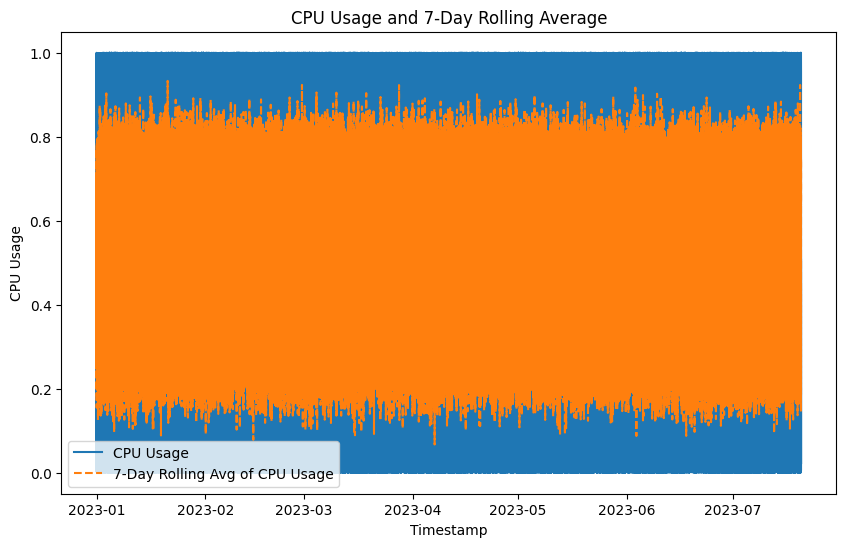

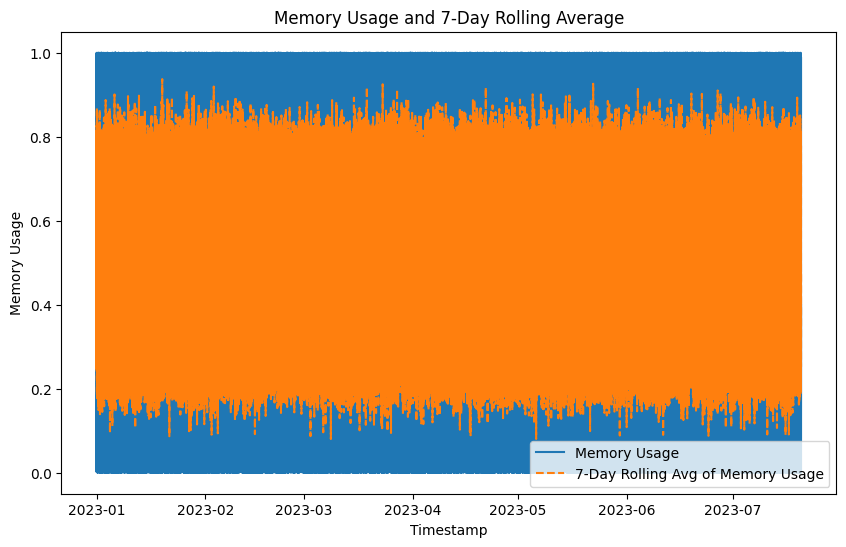

In [10]:
# Plotting the calculations
import matplotlib.pyplot as plt

# Plotting CPU Usage and its 7-day rolling avg
plt.figure(figsize=(10, 6))
plt.plot(Cloud_data['timestamp'], Cloud_data['cpu_usage'], label='CPU Usage')
plt.plot(Cloud_data['timestamp'], Cloud_data['cpu_usage_7d_avg'], label='7-Day Rolling Avg of CPU Usage', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.title('CPU Usage and 7-Day Rolling Average')
plt.legend()
plt.show()

#plotting the memory ussage and its 7-day rolling avg
plt.figure(figsize=(10, 6))
plt.plot(Cloud_data['timestamp'], Cloud_data['memory_usage'], label='Memory Usage')
plt.plot(Cloud_data['timestamp'], Cloud_data['memory_usage_7d_avg'], label='7-Day Rolling Avg of Memory Usage', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage')
plt.title('Memory Usage and 7-Day Rolling Average')
plt.legend()
plt.show()

phase -4 getting the features and preparing to split the data

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode categorical variables
label_encoder = LabelEncoder()
Cloud_data['task_type_encoded'] = label_encoder.fit_transform(Cloud_data['task_type'])
Cloud_data['task_priority_encoded'] = label_encoder.fit_transform(Cloud_data['task_priority'])
Cloud_data['task_status_encoded'] = label_encoder.fit_transform(Cloud_data['task_status'])

# Drop original categorical columns and 'timestamp'
Cloud_data_processed = Cloud_data.drop(['timestamp', 'task_type', 'task_priority', 'task_status'], axis=1)

In [12]:
# Features (excluding target variables and 'vm_id' if it's not used as a feature)
X = Cloud_data_processed.drop(['cpu_usage', 'memory_usage', 'network_traffic', 'vm_id'], axis=1)

# Targets
y = Cloud_data_processed[['cpu_usage', 'memory_usage', 'network_traffic']]

In [13]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1600000, 11) (1600000, 3)
Testing set shape: (400000, 11) (400000, 3)


In [48]:
print("Feature names:", X_train.columns.tolist())

Feature names: ['power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency', 'hour_of_day', 'day_of_week', 'cpu_usage_7d_avg', 'memory_usage_7d_avg', 'task_type_encoded', 'task_priority_encoded', 'task_status_encoded']


phase -5 model selection and training

In [15]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

# Initialize dictionaries to hold the models and predictions
models_lgbm = {}
predictions_lgbm = {}
predictions_rf = {}

# Train a LightGBM and RandomForest model for each target
for target in y_train.columns:
    # LightGBM
    model_lgbm = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, num_leaves=31)
    model_lgbm.fit(X_train, y_train[target])
    models_lgbm[target] = model_lgbm
    predictions_lgbm[target] = model_lgbm.predict(X_test)
    
    # RandomForest
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train[target])
    # Assuming you want to keep the RandomForest models as well, you could store them similarly to models_lgbm
    predictions_rf[target] = model_rf.predict(X_test)

# Combine predictions
# For simplicity, here we're just averaging the predictions from both models for each target
y_pred_combined = {}
for target in predictions_lgbm:
    y_pred_combined[target] = (predictions_lgbm[target] + predictions_rf[target]) / 2

# Convert predictions to a suitable format for evaluation, e.g., DataFrame
y_pred_combined_df = pd.DataFrame(y_pred_combined, index=X_test.index)

# Example evaluation with RMSE for combined predictions
from sklearn.metrics import mean_squared_error
import numpy as np

for target in y_train.columns:
    rmse = np.sqrt(mean_squared_error(y_test[target], y_pred_combined_df[target]))
    print(f"Combined RMSE for {target}: {rmse}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 1600000, number of used features: 11
[LightGBM] [Info] Start training from score 0.500127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 1600000, number of used features: 11
[LightGBM] [Info] Start training from score 0.499858
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

In [16]:
import joblib

# Assuming the rest of your code is as provided above

# Directory where you want to save the models
models_dir = "/Users/sasanksasi/Downloads/project/cloudverse.ai/models"

# Save the LightGBM models
for target, model in models_lgbm.items():
    joblib.dump(model, f"{models_dir}/lgbm_{target}.joblib")

# Save the RandomForest models
# Assuming you also store the RandomForest models in a dictionary similar to models_lgbm
models_rf = {}
for target in y_train.columns:
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train[target])
    models_rf[target] = model_rf
    joblib.dump(model_rf, f"{models_dir}/rf_{target}.joblib")

# Now your models are saved and can be loaded later for prediction or further analysis

trying the saved models


In [49]:
dataset_path = "/Users/sasanksasi/Downloads/project/cloudverse.ai/subpart_data.csv"
new_data = pd.read_csv(dataset_path)

In [52]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib  # For loading the saved models

# Assuming the new data is loaded into a DataFrame named `new_data`
# and the saved models are named 'model_cpu_usage.pkl', 'model_memory_usage.pkl', 'model_network_traffic.pkl'

# Step 1: Preprocess the new data
def preprocess_data(data):
    # Fill missing numeric values with mean
    data.fillna(data.mean(numeric_only=True), inplace=True)
    
    # Fill missing categorical values with mode
    for column in ['task_type', 'task_priority', 'task_status']:
        data[column] = data[column].fillna(data[column].mode()[0])
    
    # Normalize specified columns
    columns_to_normalize = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency']
    scaler = MinMaxScaler()
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
    
    # Convert 'timestamp' to datetime and extract features
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['hour_of_day'] = data['timestamp'].dt.hour
    data['day_of_week'] = data['timestamp'].dt.dayofweek
    
    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['task_type_encoded'] = label_encoder.fit_transform(data['task_type'])
    data['task_priority_encoded'] = label_encoder.fit_transform(data['task_priority'])
    data['task_status_encoded'] = label_encoder.fit_transform(data['task_status'])
    
    # Drop original categorical columns and 'timestamp'
    processed_data = data.drop(['timestamp', 'task_type', 'task_priority', 'task_status'], axis=1)
    
    # Ensure all expected features are present (adjust this list based on the actual model requirements)
    expected_features = ['hour_of_day', 'day_of_week', 'cpu_usage_7d_avg', 'memory_usage_7d_avg', 'task_type_encoded', 'task_priority_encoded', 'task_status_encoded', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency']
    missing_features = set(expected_features) - set(processed_data.columns)
    for feature in missing_features:
        processed_data[feature] = 0  # Assuming 0 is a reasonable default for missing features; adjust as necessary
    
    return processed_data

# Step 2: Prepare features for prediction
def prepare_features(data):
    # Ensure the features are in the exact order as during model training
    ordered_features = [
        'power_consumption', 
        'num_executed_instructions', 
        'execution_time', 
        'energy_efficiency', 
        'hour_of_day', 
        'day_of_week', 
        'cpu_usage_7d_avg', 
        'memory_usage_7d_avg', 
        'task_type_encoded', 
        'task_priority_encoded', 
        'task_status_encoded'
    ]
    
    # Select and order the features from the data
    X = data[ordered_features]
    return X

# Step 3: Load models and make predictions
def make_predictions(X):
    # Load the saved models
    model_cpu_usage = joblib.load('/Users/sasanksasi/Downloads/project/cloudverse.ai/models/lgbm_cpu_usage.joblib')
    model_memory_usage = joblib.load('models/rf_memory_usage.joblib')
    model_network_traffic = joblib.load('/Users/sasanksasi/Downloads/project/cloudverse.ai/models/lgbm_network_traffic.joblib')
    
    # Make predictions
    predictions = {
        'cpu_usage': model_cpu_usage.predict(X),
        'memory_usage': model_memory_usage.predict(X),
        'network_traffic': model_network_traffic.predict(X)
    }
    
    return predictions

# Main function to process new data and make predictions
def process_and_predict(new_data):
    preprocessed_data = preprocess_data(new_data)
    features = prepare_features(preprocessed_data)
    predictions = make_predictions(features)
    return predictions

# Example usage
# new_data = pd.read_csv('path_to_new_data.csv')  # Load your new data
predictions = process_and_predict(new_data)
print(predictions)

{'cpu_usage': array([0.20787593, 0.21342992, 0.21529425, 0.21325153, 0.21672568,
       0.22777542, 0.21292281, 0.22405875, 0.23623302, 0.20837431,
       0.2183395 , 0.21083427, 0.20884744, 0.22331425, 0.21481693,
       0.22364802, 0.21115862, 0.21574776, 0.21587014, 0.21219074,
       0.22179339, 0.23161406, 0.21320459, 0.21471678, 0.21365011,
       0.21556754, 0.22113476, 0.21877668, 0.21692187, 0.22268293,
       0.21510034, 0.21289312, 0.23648165, 0.24004177, 0.23340908,
       0.21627902, 0.2294514 , 0.2232466 , 0.21724867, 0.21133225,
       0.22748533, 0.23976306, 0.21651555, 0.21060792, 0.21654468,
       0.22644583, 0.22305916, 0.21436356, 0.21524632, 0.21766843,
       0.20945257, 0.21535535, 0.21616325, 0.23196625, 0.21607781,
       0.21197413, 0.22720862, 0.2111821 , 0.21903238, 0.21503245,
       0.21639273, 0.21163929, 0.23020646, 0.21679575, 0.22002648,
       0.21066773, 0.23324424, 0.21390512, 0.23063035, 0.22184149,
       0.23866291, 0.21293347, 0.22398194, 0.210